### Review for Final Exam

## Data Analysis of the Ontario Green House Gas Activities (Ontario Data Catalogue)

Author: Darren Singh     

General Flow of the Notebook:

* After reading in the dataset, I will begin by cleaning the data

* I will follow this up with an exploratory analysis, in which I will formulate a hypothesis

* I will then perform some feature engineering

* After this I will fit, test and cross validate several classification models. I will then select the best performing model and tune its hyper parameters and check its performance metrics.

* I will then conclude by explaining my results

In [5]:
# imports 
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, precision_score, roc_auc_score, roc_curve, accuracy_score, mean_squared_error, confusion_matrix, classification_report
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [6]:
# load in data
data = pd.read_csv("C:\\Users\\darre\\Downloads\\0996bfd9-ed27-4f78-8ed1-9e024185f10a.csv")
data

,_id,Year,Ontario GHG ID,Facility Owner,Facility Name,Facility City,Facility Primary NAICS Code,Carbon dioxide (CO2) from non-biomass in CO2e (t),Carbon dioxide (CO2) from biomass in CO2e (t),Methane (CH4) in CO2e (t),Nitrous oxide (N2O) in CO2e (t),Sulphur hexafluoride (SF6) in CO2e (t),Hydrofluorocarbons (HFCs) in CO2e (t),Perfluorocarbons (PFCs) in CO2e (t),Nitrogen Trifluoride (NF3) in CO2e (t),Total CO2e from all sources in CO2e (t),Reporting Amount in CO2e (t),Verification Amount in CO2e (t),Accredited Verification Body
0,1,2010,1001,ADM Agri-Industries,ADM Windsor,Windsor,311224,69652.00,0.0,29.0000,395.0000,0.0,0.000,0.0,NaN,70077,70077,NaN,NaN
1,2,2010,1002,Air Products Canada Ltd,Corunna Hydrogen Facility,Corunna,325120,389933.00,0.0,0.0000,0.0000,0.0,0.000,0.0,NaN,389933,389933,NaN,NaN
2,3,2010,1003,Algonquin Power Energy From Waste Inc.,Algonquin Power Energy from Waste Inc.,Brampton,562210,40378.00,44865.0,555.0000,1113.0000,0.0,0.000,0.0,NaN,86911,42046,NaN,NaN
3,4,2010,1005,ArcelorMittal Dofasco Inc.,Dofasco Hamilton,Hamilton,331110,4923106.00,0.0,24680.0000,8518.0000,0.0,0.000,0.0,NaN,4956304,4956304,NaN,NaN
4,5,2010,1006,Atlantic Packaging Products Ltd.,111 Progress,Scarborough,322130,42456.00,15218.0,18.0000,231.0000,0.0,0.000,0.0,NaN,57923,42705,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2553,2020,1503,Global Upholstery Co. Ltd.,Global Upholstery,DOWNSVIEW,337214,5163.90,NaN,2.6500,27.1180,NaN,NaN,NaN,NaN,5194,5194,0.0,NaN
2553,2554,2020,1504,Kellogg Canada Inc.,Belleville Plant,BELLEVILLE,311230,10844.00,NaN,5.3500,56.6200,NaN,NaN,NaN,NaN,10906,10906,10906.0,NaN
2554,2555,2020,1505,"Canada Bread Company, Ltd.",Bimbo Canada EPS - Integrated Facility,HANNON,311814,12018.00,NaN,5.6675,60.2556,NaN,322.785,NaN,NaN,12407,12407,12084.0,NaN
2555,2556,2020,1506,Williams Operating Corporation,Williams Mine,MARATHON,212220,30059.00,NaN,425.0000,82248.0000,NaN,NaN,NaN,NaN,112732,112732,93690.0,NaN


In [7]:
# prelimiary check for type errors and missing data
data.info()

# some columns have significant amounts of data missing
# will need to impute or drop columns entirely

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   _id                                                2557 non-null   int64  
 1   Year                                               2557 non-null   int64  
 2   Ontario GHG ID                                     2557 non-null   int64  
 3   Facility Owner                                     2557 non-null   object 
 4   Facility Name                                      2557 non-null   object 
 5   Facility City                                      2556 non-null   object 
 6   Facility Primary NAICS Code                        2557 non-null   int64  
 7   Carbon dioxide (CO2) from non-biomass in CO2e (t)  2510 non-null   float64
 8   Carbon dioxide (CO2) from biomass in CO2e (t)      1983 non-null   float64
 9   Methane 

In [8]:
# descriptive statistics
data.describe(include='all')

,_id,Year,Ontario GHG ID,Facility Owner,Facility Name,Facility City,Facility Primary NAICS Code,Carbon dioxide (CO2) from non-biomass in CO2e (t),Carbon dioxide (CO2) from biomass in CO2e (t),Methane (CH4) in CO2e (t),Nitrous oxide (N2O) in CO2e (t),Sulphur hexafluoride (SF6) in CO2e (t),Hydrofluorocarbons (HFCs) in CO2e (t),Perfluorocarbons (PFCs) in CO2e (t),Nitrogen Trifluoride (NF3) in CO2e (t),Total CO2e from all sources in CO2e (t),Reporting Amount in CO2e (t),Verification Amount in CO2e (t),Accredited Verification Body
count,2557.000000,2557.000000,2557.000000,2557,2557,2556,2557.000000,2.510000e+03,1.983000e+03,2552.000000,2512.000000,1856.000000,1860.000000,1838.0,1110.0,2.557000e+03,2.557000e+03,2.408000e+03,1701
unique,NaN,NaN,NaN,473,550,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82
top,NaN,NaN,NaN,Northland Power Inc.,Main Campus,Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Conestoga-Rovers & Associates Limited (CRA)
freq,NaN,NaN,NaN,44,14,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253
mean,1279.000000,2016.043410,1163.389128,NaN,NaN,NaN,324477.614001,1.871808e+05,2.756836e+04,4380.426320,1350.568760,347.913171,15.180463,0.0,0.0,2.113696e+05,1.895825e+05,1.749031e+05,NaN
std,738.286643,3.077518,126.130890,NaN,NaN,NaN,134967.397792,5.364644e+05,1.396163e+05,25779.347436,4864.816450,3786.162526,407.089779,0.0,0.0,5.472606e+05,5.353952e+05,4.991266e+05,NaN
min,1.000000,2010.000000,1001.000000,NaN,NaN,NaN,111419.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,640.000000,2014.000000,1066.000000,NaN,NaN,NaN,221119.000000,1.517636e+04,0.000000e+00,7.938000,88.834375,0.000000,0.000000,0.0,0.0,1.805300e+04,1.653500e+04,1.419075e+04,NaN
50%,1279.000000,2017.000000,1134.000000,NaN,NaN,NaN,325110.000000,3.399424e+04,0.000000e+00,23.278500,213.652000,0.000000,0.000000,0.0,0.0,4.184200e+04,3.646900e+04,3.160600e+04,NaN
75%,1918.000000,2019.000000,1225.000000,NaN,NaN,NaN,331317.000000,1.039892e+05,0.000000e+00,276.107500,671.674000,0.000000,0.000000,0.0,0.0,1.293610e+05,1.117000e+05,9.369850e+04,NaN


## Data Cleaning Begins

* Will begin by filling null values

* Will drop duplicates

In [9]:
# start with handling missing values

# facility city has a single null record
print(data[data['Facility City'].isna()].to_string())
# given that this is sunnybrook, the city should Toronto
data['Facility City'].fillna('Toronto', inplace=True)
# verify filling worked
print(data[data['Facility City'].isna()].to_string())

       _id  Year  Ontario GHG ID                     Facility Owner                      Facility Name Facility City  Facility Primary NAICS Code  Carbon dioxide (CO2) from non-biomass in CO2e (t)  Carbon dioxide (CO2) from biomass in CO2e (t)  Methane (CH4) in CO2e (t)  Nitrous oxide (N2O) in CO2e (t)  Sulphur hexafluoride (SF6) in CO2e (t)  Hydrofluorocarbons (HFCs) in CO2e (t)  Perfluorocarbons (PFCs) in CO2e (t)  Nitrogen Trifluoride (NF3) in CO2e (t)  Total CO2e from all sources in CO2e (t)  Reporting Amount in CO2e (t)  Verification Amount in CO2e (t) Accredited Verification Body
1196  1197  2016            1226  Sunnybrook Health Sciences Centre  Sunnybrook Health Sciences Centre           NaN                       622111                                            23294.7                                            0.0                      9.639                          134.478                                     0.0                                    0.0                         

In [10]:
# carbon dioxide from non-biomass has missing values
missingAmount = data[data['Carbon dioxide (CO2) from non-biomass in CO2e (t)'].isna()]['_id'].count()
print("\nMissing Carbon Dioxide from non-biomass makes up ", missingAmount / data['_id'].count() * 100, "percent of the data")
# this could be implying that these facilities have no emissions from non-biomass but without more information its not safe to assume that
# since records make up less than 10% of the data they will be dropped
data.dropna(subset=['Carbon dioxide (CO2) from non-biomass in CO2e (t)'],inplace=True)
# verify it worked
print(data[data['Carbon dioxide (CO2) from non-biomass in CO2e (t)'].isna()]['_id'].count())


Missing Carbon Dioxide from non-biomass makes up  1.838091513492374 percent of the data
0


In [11]:
# carbon dioxide from biomass has missing values
missingAmount = data[data['Carbon dioxide (CO2) from biomass in CO2e (t)'].isna()]['_id'].count()
print("\nMissing Carbon Dioxide from biomass makes up ", missingAmount / data['_id'].count() * 100, "percent of the data")
# this is a significant amount of the data, requires some form of imputation
# test filling with either the average or the median
# if neither work could consider imputing by mean of the city
print("Column before any imputation:")
print(data['Carbon dioxide (CO2) from biomass in CO2e (t)'].describe().to_string())
data2 = data.copy()
data2['Carbon dioxide (CO2) from biomass in CO2e (t)'].fillna(value=data2['Carbon dioxide (CO2) from biomass in CO2e (t)'].mean(), inplace=True)
print("column after mean imputation")
print(data2['Carbon dioxide (CO2) from biomass in CO2e (t)'].describe().to_string())
data3 = data.copy()
data3['Carbon dioxide (CO2) from biomass in CO2e (t)'].fillna(value=data3['Carbon dioxide (CO2) from biomass in CO2e (t)'].median(), inplace=True)
print("Column after median imputation")
print(data3['Carbon dioxide (CO2) from biomass in CO2e (t)'].describe().to_string())
# attempt to fill it in by the average of the city for each facility
# grab the mean per city
data4 = data.copy()
data4['Carbon dioxide (CO2) from biomass in CO2e (t)'].fillna(data4.groupby('Facility City')['Carbon dioxide (CO2) from biomass in CO2e (t)'].transform('mean'), inplace=True)
print("Column after mean imputation per city")
print(data4['Carbon dioxide (CO2) from biomass in CO2e (t)'].describe().to_string())
# yields a different mean and doesnt fill in all values, maybe some cities dont have anything for this column
# impute by median per city
data5 = data.copy()
data5['Carbon dioxide (CO2) from biomass in CO2e (t)'].fillna(data5.groupby('Facility City')['Carbon dioxide (CO2) from biomass in CO2e (t)'].transform('median'), inplace=True)
print("Column after median imputation per city")
print(data5['Carbon dioxide (CO2) from biomass in CO2e (t)'].describe().to_string())


# both median imputation and mean imputation per city seem decent
# median imputation changes the mean a lot but keeps the distribution the same
# mean imputation by city changes the mean less but slightly changes the distribution (percentiles)
# might go with mean imputation by city because it seems more relevant and intuitive than just plopping in the median

# cant use imputation by city, contains missing values
# not all cities have data for this 
# must use median imputation

data = data3


Missing Carbon Dioxide from biomass makes up  21.792828685258964 percent of the data
Column before any imputation:
count    1.963000e+03
mean     2.753783e+04
std      1.402708e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.346123e+06
column after mean imputation
count    2.510000e+03
mean     2.753783e+04
std      1.240413e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.753783e+04
max      1.346123e+06
Column after median imputation
count    2.510000e+03
mean     2.153656e+04
std      1.245614e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.346123e+06
Column after mean imputation per city
count    2.230000e+03
mean     2.903180e+04
std      1.360781e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.066478e+03
max      1.346123e+06
Column after median imputation per city
count    2.230000e+03
mean     2.899731e+0

In [12]:
# methane and nitrous have missing values making up less than 1% of the data
# drop them
data.dropna(subset=['Methane (CH4) in CO2e (t)', 'Nitrous oxide (N2O) in CO2e (t)'], inplace=True)
print("\nMissing data from Methane and Nitrous make up less than 1 percent of the data")
print(data[data['Methane (CH4) in CO2e (t)'].isna()]['_id'].count())
print(data[data['Nitrous oxide (N2O) in CO2e (t)'].isna()]['_id'].count())


Missing data from Methane and Nitrous make up less than 1 percent of the data
0
0


In [13]:
# next is sulphur
missingAmount = data[data['Sulphur hexafluoride (SF6) in CO2e (t)'].isna()]['_id'].count()
print("\nMissing data in Sulphur makes up", missingAmount / data['_id'].count() * 100, "percent of the data")
# must impute
print("Column before any imputation:")
print(data['Sulphur hexafluoride (SF6) in CO2e (t)'].describe().to_string())
data2 = data.copy()
data2['Sulphur hexafluoride (SF6) in CO2e (t)'].fillna(value=data2['Sulphur hexafluoride (SF6) in CO2e (t)'].mean(), inplace=True)
print("column after mean imputation")
print(data2['Sulphur hexafluoride (SF6) in CO2e (t)'].describe().to_string())
data3 = data.copy()
data3['Sulphur hexafluoride (SF6) in CO2e (t)'].fillna(value=data3['Sulphur hexafluoride (SF6) in CO2e (t)'].median(), inplace=True)
print("Column after median imputation")
print(data3['Sulphur hexafluoride (SF6) in CO2e (t)'].describe().to_string())
# attempt to fill it in by the average of the city for each facility
# grab the mean per city
data4 = data.copy()
data4['Sulphur hexafluoride (SF6) in CO2e (t)'].fillna(data4.groupby('Facility City')['Sulphur hexafluoride (SF6) in CO2e (t)'].transform('mean'), inplace=True)
print("Column after mean imputation per city")
print(data4['Sulphur hexafluoride (SF6) in CO2e (t)'].describe().to_string())
# yields a different mean and doesnt fill in all values, maybe some cities dont have anything for this column
# impute by median per city
data5 = data.copy()
data5['Sulphur hexafluoride (SF6) in CO2e (t)'].fillna(data5.groupby('Facility City')['Sulphur hexafluoride (SF6) in CO2e (t)'].transform('median'), inplace=True)
print("Column after median imputation per city")
print(data5['Sulphur hexafluoride (SF6) in CO2e (t)'].describe().to_string())

# mean imputation per city seems the best
# keeps the same distribution
# similar std
# has a different mean but all of the imputations have different means

# cant use mean imputation per city, some cities missing this info
# must use median imputation

data = data3


Missing data in Sulphur makes up 25.98802395209581 percent of the data
Column before any imputation:
count     1854.000000
mean       288.901614
std       3320.510668
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      56117.200000
column after mean imputation
count     2505.000000
mean       288.901614
std       2856.442112
min          0.000000
25%          0.000000
50%          0.000000
75%        288.901614
max      56117.200000
Column after median imputation
count     2505.000000
mean       213.821794
std       2859.251940
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      56117.200000
Column after mean imputation per city
count     1946.000000
mean       376.931836
std       3293.383459
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      56117.200000
Column after median imputation per city
count     1946.000000
mean       376.931836
std       32

In [14]:
# hydrocarbons has missing data
missingAmount = data[data['Hydrofluorocarbons (HFCs) in CO2e (t)'].isna()]['_id'].count()
print("\nMissing data in hydrocarbons makes up", missingAmount / data['_id'].count() * 100, "percent of the data")
# must impute
print("Column before any imputation:")
print(data['Hydrofluorocarbons (HFCs) in CO2e (t)'].describe().to_string())
data2 = data.copy()
data2['Hydrofluorocarbons (HFCs) in CO2e (t)'].fillna(value=data2['Hydrofluorocarbons (HFCs) in CO2e (t)'].mean(), inplace=True)
print("column after mean imputation")
print(data2['Hydrofluorocarbons (HFCs) in CO2e (t)'].describe().to_string())
data3 = data.copy()
data3['Hydrofluorocarbons (HFCs) in CO2e (t)'].fillna(value=data3['Hydrofluorocarbons (HFCs) in CO2e (t)'].median(), inplace=True)
print("Column after median imputation")
print(data3['Hydrofluorocarbons (HFCs) in CO2e (t)'].describe().to_string())
# attempt to fill it in by the average of the city for each facility
# grab the mean per city
data4 = data.copy()
data4['Hydrofluorocarbons (HFCs) in CO2e (t)'].fillna(data4.groupby('Facility City')['Hydrofluorocarbons (HFCs) in CO2e (t)'].transform('mean'), inplace=True)
print("Column after mean imputation per city")
print(data4['Hydrofluorocarbons (HFCs) in CO2e (t)'].describe().to_string())
# yields a different mean and doesnt fill in all values, maybe some cities dont have anything for this column
# impute by median per city
data5 = data.copy()
data5['Hydrofluorocarbons (HFCs) in CO2e (t)'].fillna(data5.groupby('Facility City')['Hydrofluorocarbons (HFCs) in CO2e (t)'].transform('median'), inplace=True)
print("Column after median imputation per city")
print(data5['Hydrofluorocarbons (HFCs) in CO2e (t)'].describe().to_string())

# will go with median imputation
# slight change to the mean
# maintains the same percentile distribution
# other methods either drastically change the mean or the percentile distribution

data = data3


Missing data in hydrocarbons makes up 25.748502994011975 percent of the data
Column before any imputation:
count     1860.000000
mean        15.180463
std        407.089779
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17396.000000
column after mean imputation
count     2505.000000
mean        15.180463
std        350.762156
min          0.000000
25%          0.000000
50%          0.000000
75%         15.180463
max      17396.000000
Column after median imputation
count     2505.000000
mean        11.271721
std        350.824979
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17396.000000
Column after mean imputation per city
count     1921.000000
mean        31.651588
std        420.518002
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17396.000000
Column after median imputation per city
count     1921.000000
mean        31.415063
std   

In [15]:
# perfluorocarbons has lots of missing data
missingAmount = data[data['Perfluorocarbons (PFCs) in CO2e (t)'].isna()]['_id'].count()
print("\nMissing data in perfluorocarbons makes up", missingAmount / data['_id'].count() * 100, "percent of the data")
# must impute
print("Column before any imputation:")
print(data['Perfluorocarbons (PFCs) in CO2e (t)'].describe().to_string())
data2 = data.copy()
data2['Perfluorocarbons (PFCs) in CO2e (t)'].fillna(value=data2['Perfluorocarbons (PFCs) in CO2e (t)'].mean(), inplace=True)
print("column after mean imputation")
print(data2['Perfluorocarbons (PFCs) in CO2e (t)'].describe().to_string())
data3 = data.copy()
data3['Perfluorocarbons (PFCs) in CO2e (t)'].fillna(value=data3['Perfluorocarbons (PFCs) in CO2e (t)'].median(), inplace=True)
print("Column after median imputation")
print(data3['Perfluorocarbons (PFCs) in CO2e (t)'].describe().to_string())
# attempt to fill it in by the average of the city for each facility
# grab the mean per city
data4 = data.copy()
data4['Perfluorocarbons (PFCs) in CO2e (t)'].fillna(data4.groupby('Facility City')['Perfluorocarbons (PFCs) in CO2e (t)'].transform('mean'), inplace=True)
print("Column after mean imputation per city")
print(data4['Perfluorocarbons (PFCs) in CO2e (t)'].describe().to_string())
# yields a different mean and doesnt fill in all values, maybe some cities dont have anything for this column
# impute by median per city
data5 = data.copy()
data5['Perfluorocarbons (PFCs) in CO2e (t)'].fillna(data5.groupby('Facility City')['Perfluorocarbons (PFCs) in CO2e (t)'].transform('median'), inplace=True)
print("Column after median imputation per city")
print(data5['Perfluorocarbons (PFCs) in CO2e (t)'].describe().to_string())

# cant use per cities because some cities missing information

# will use mean imputation because it results in no change to data
data=data2


Missing data in perfluorocarbons makes up 26.626746506986027 percent of the data
Column before any imputation:
count    1838.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
column after mean imputation
count    2505.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Column after median imputation
count    2505.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Column after mean imputation per city
count    1838.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Column after median imputation per city
count    1838.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0


In [16]:
# nitrogen has lots of missing data
missingAmount = data[data['Nitrogen Trifluoride (NF3) in CO2e (t)'].isna()]['_id'].count()
print("\nMissing data in nitrogen makes up", missingAmount / data['_id'].count() * 100, "percent of the data")
# must impute
print("Column before any imputation:")
print(data['Nitrogen Trifluoride (NF3) in CO2e (t)'].describe().to_string())
data2 = data.copy()
data2['Nitrogen Trifluoride (NF3) in CO2e (t)'].fillna(value=data2['Nitrogen Trifluoride (NF3) in CO2e (t)'].mean(), inplace=True)
print("column after mean imputation")
print(data2['Nitrogen Trifluoride (NF3) in CO2e (t)'].describe().to_string())
data3 = data.copy()
data3['Nitrogen Trifluoride (NF3) in CO2e (t)'].fillna(value=data3['Nitrogen Trifluoride (NF3) in CO2e (t)'].median(), inplace=True)
print("Column after median imputation")
print(data3['Nitrogen Trifluoride (NF3) in CO2e (t)'].describe().to_string())
# attempt to fill it in by the average of the city for each facility
# grab the mean per city
data4 = data.copy()
data4['Nitrogen Trifluoride (NF3) in CO2e (t)'].fillna(data4.groupby('Facility City')['Nitrogen Trifluoride (NF3) in CO2e (t)'].transform('mean'), inplace=True)
print("Column after mean imputation per city")
print(data4['Nitrogen Trifluoride (NF3) in CO2e (t)'].describe().to_string())
# yields a different mean and doesnt fill in all values, maybe some cities dont have anything for this column
# impute by median per city
data5 = data.copy()
data5['Nitrogen Trifluoride (NF3) in CO2e (t)'].fillna(data5.groupby('Facility City')['Nitrogen Trifluoride (NF3) in CO2e (t)'].transform('median'), inplace=True)
print("Column after median imputation per city")
print(data5['Nitrogen Trifluoride (NF3) in CO2e (t)'].describe().to_string())

# cant use per cities because some cities missing information

# will use mean imputation because it results in no change to data
data=data2


Missing data in nitrogen makes up 55.688622754491014 percent of the data
Column before any imputation:
count    1110.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
column after mean imputation
count    2505.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Column after median imputation
count    2505.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Column after mean imputation per city
count    1826.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Column after median imputation per city
count    1826.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0


In [17]:
# verification amount has missing data
missingAmount = data[data['Verification Amount in CO2e (t)'].isna()]['_id'].count()
print("\nMissing data in verification makes up", missingAmount / data['_id'].count() * 100, "percent of the data")

# only 5% of the data, can drop null values

data.dropna(subset=['Verification Amount in CO2e (t)'], inplace=True)


Missing data in verification makes up 5.94810379241517 percent of the data


In [18]:
# now check the accredited column
data['Accredited Verification Body'].unique()

# many different unique values, no amount of imputation can assign a fair value to this column without introducing bias
# will replace the nulls with 'Unknown'
# might exclude this column from the analysis

data['Accredited Verification Body'].fillna(value='Unknown', inplace=True)

# could drop it here or just don't include it in the pipeline

In [19]:
# drop duplicates

data.drop_duplicates(inplace=True)

# verify cleaning was successful

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2356 entries, 149 to 2556
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   _id                                                2356 non-null   int64  
 1   Year                                               2356 non-null   int64  
 2   Ontario GHG ID                                     2356 non-null   int64  
 3   Facility Owner                                     2356 non-null   object 
 4   Facility Name                                      2356 non-null   object 
 5   Facility City                                      2356 non-null   object 
 6   Facility Primary NAICS Code                        2356 non-null   int64  
 7   Carbon dioxide (CO2) from non-biomass in CO2e (t)  2356 non-null   float64
 8   Carbon dioxide (CO2) from biomass in CO2e (t)      2356 non-null   float64
 9   Methane (CH

## Exploratory Data Analysis

* Will begin with univariate analysis, checking for outliers

* Will move onto bivariate analysis

* Will formulate hypothesis

### Univariate Analysis

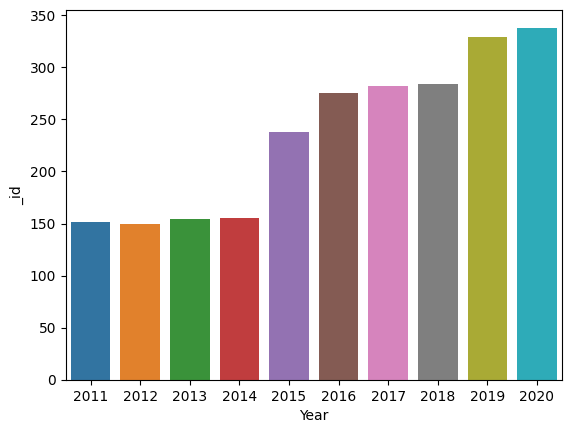

In [20]:
# begin univariate analysis, plot box plots for continues data and barplots for discrete variables

# will skip id, name and codes, irrelevant for further modelling

# start with year 

years = data.groupby('Year')
sns.barplot(x = years['_id'].count().index, y = years['_id'].count())
plt.show()

# data imbalance, many more records for years after 2014

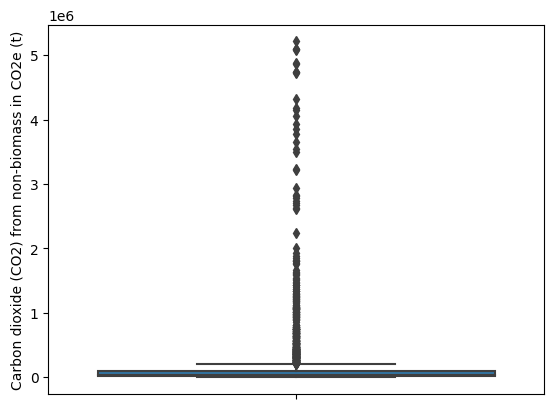

In [21]:
# CO2 from non-biomass 

sns.boxplot(data=data, y='Carbon dioxide (CO2) from non-biomass in CO2e (t)')
plt.show()

# large spread of data
# no discenable outliers to remove

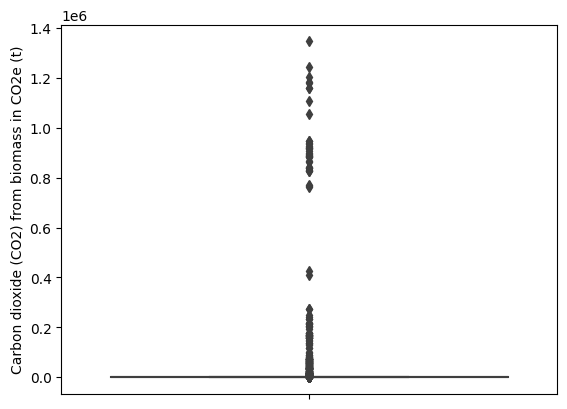

In [22]:
# CO2 from biomass

sns.boxplot(data=data, y='Carbon dioxide (CO2) from biomass in CO2e (t)')
plt.show()

# large spread of data
# large gap in data

# might be a possible outlier alone at the top, but still somewhat close to the remaining data
# will leave it in for now, might be useful to know a particlular facility with high CO2 emissions from biomass

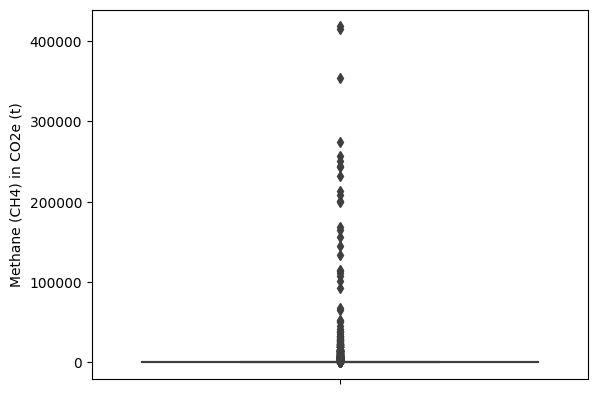

In [23]:
# methane

sns.boxplot(data=data, y='Methane (CH4) in CO2e (t)')
plt.show()

# large spread of data
# odd gap

# potential for 3 outliers, will remove them, very different from rest of the data

data = data[data['Methane (CH4) in CO2e (t)'] < 300000]

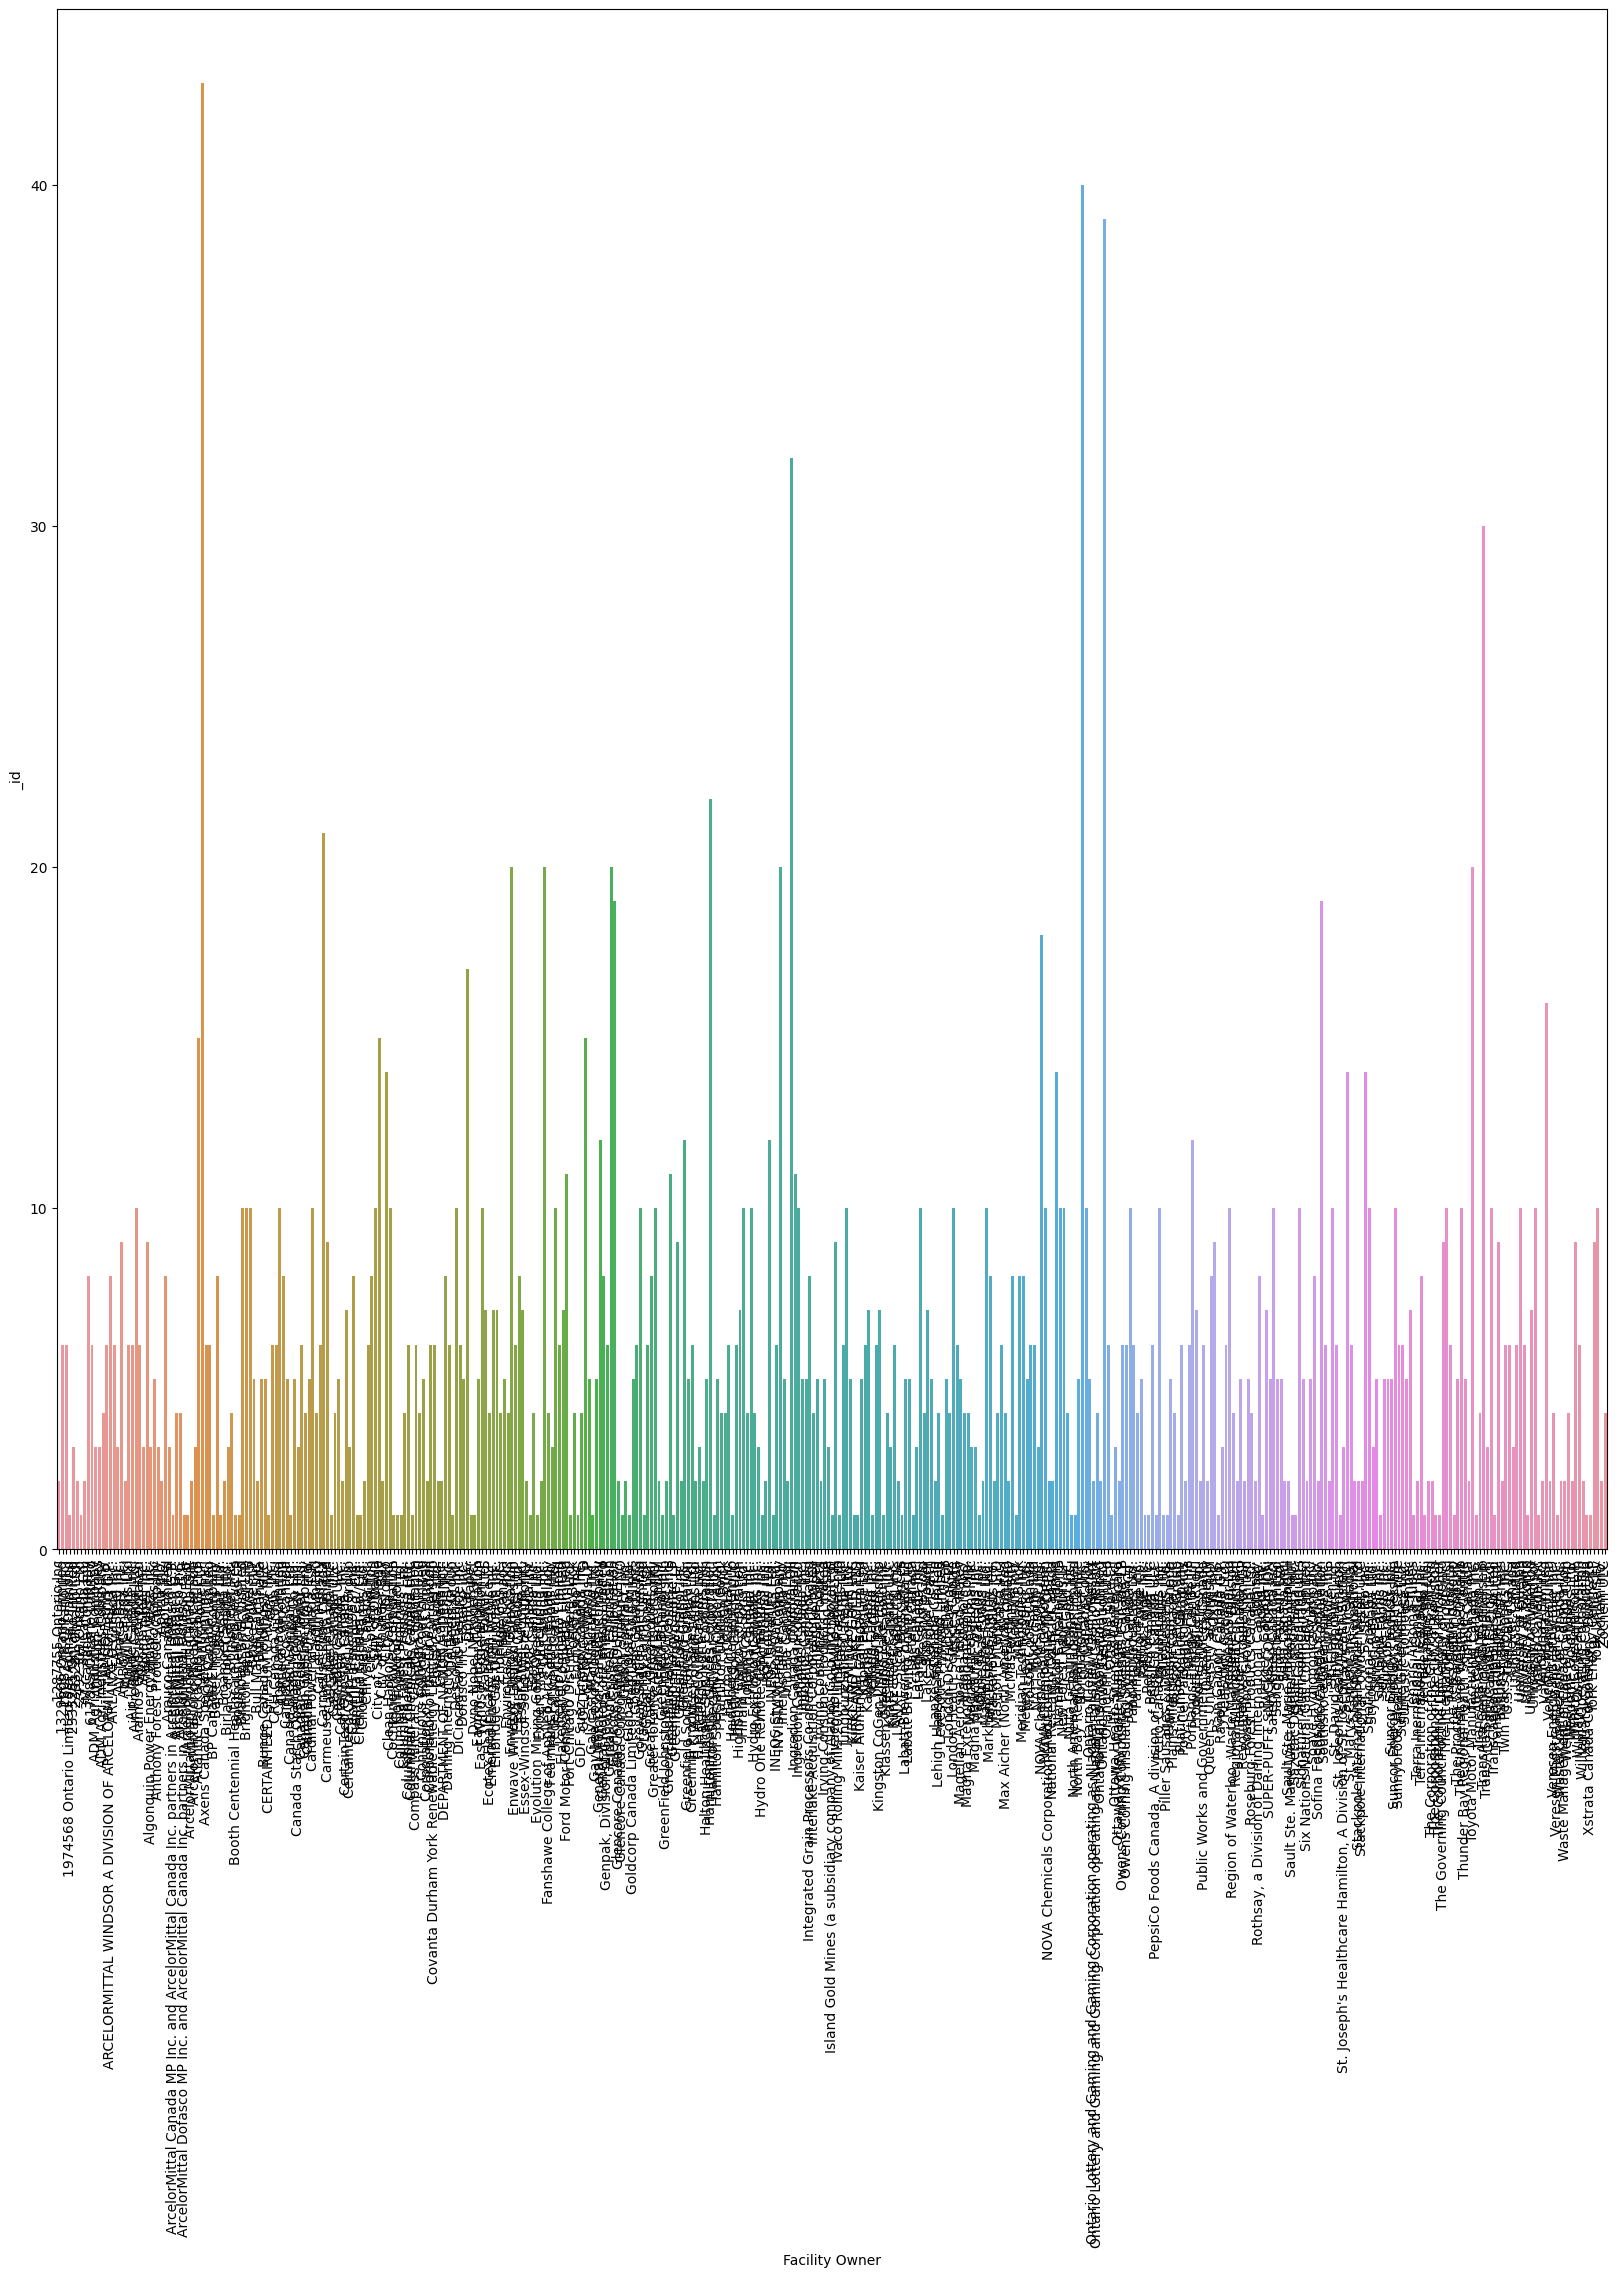

In [24]:
# facility owner

years = data.groupby('Facility Owner')
plt.figure(figsize=(20,20))
sns.barplot(x = years['_id'].count().index, y = years['_id'].count())
plt.xticks(rotation=90)
plt.show()

# many different owners, but some owners appear to own multiple facilities

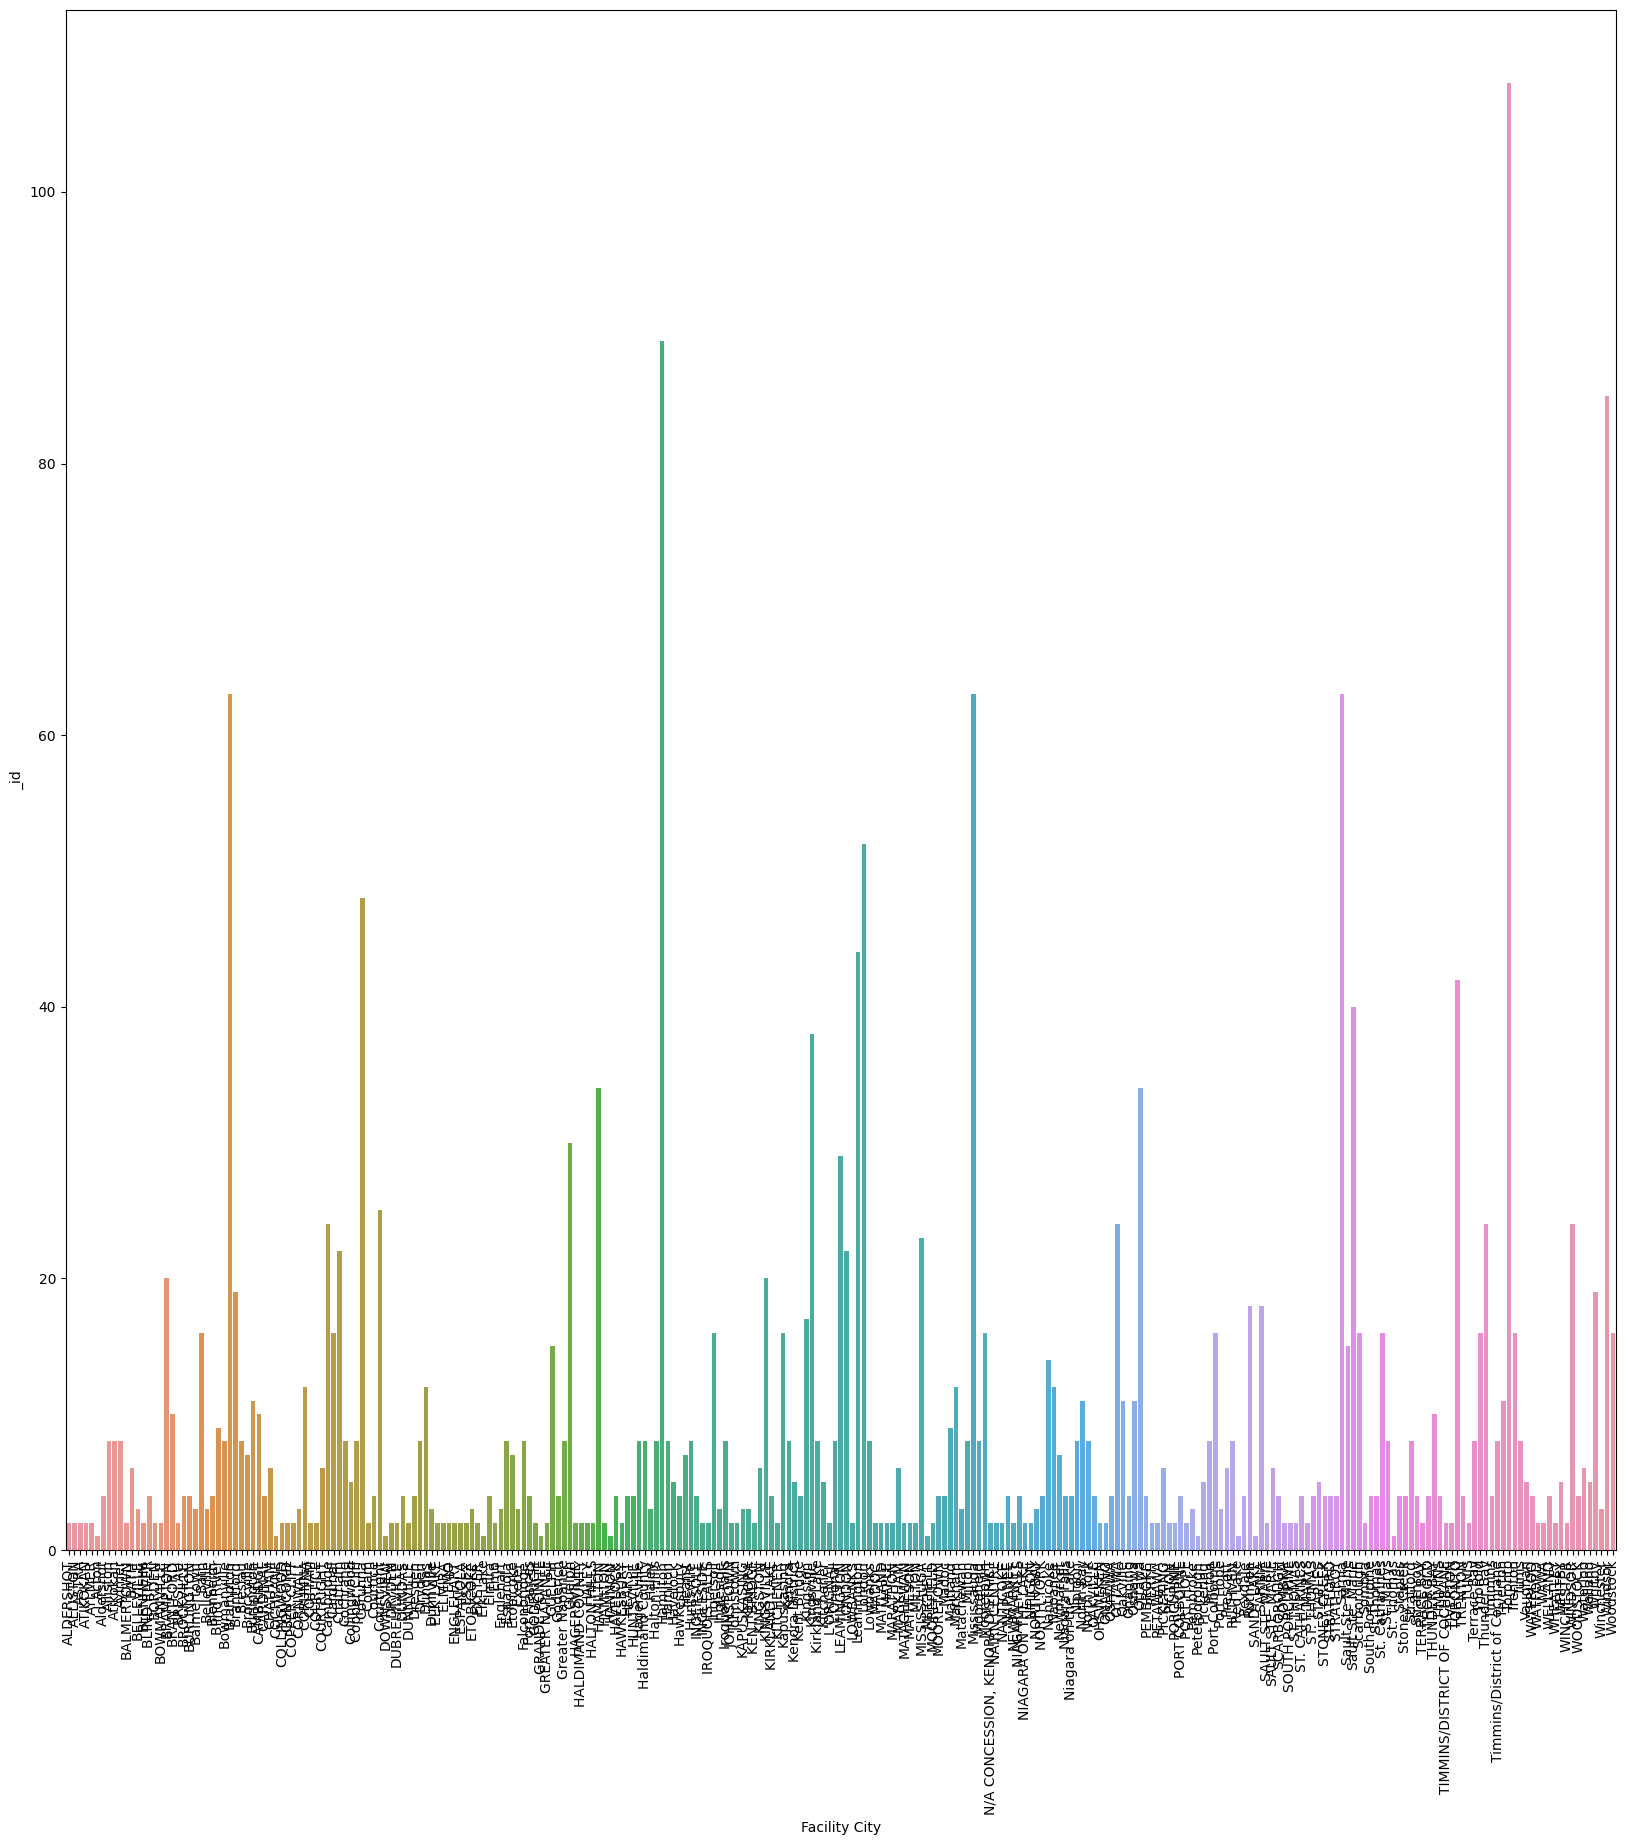

In [25]:
# facility city

years = data.groupby('Facility City')
plt.figure(figsize=(20,20))
sns.barplot(x = years['_id'].count().index, y = years['_id'].count())
plt.xticks(rotation=90)
plt.show()

# many different cities, some cities have significantly more facilities in them than others

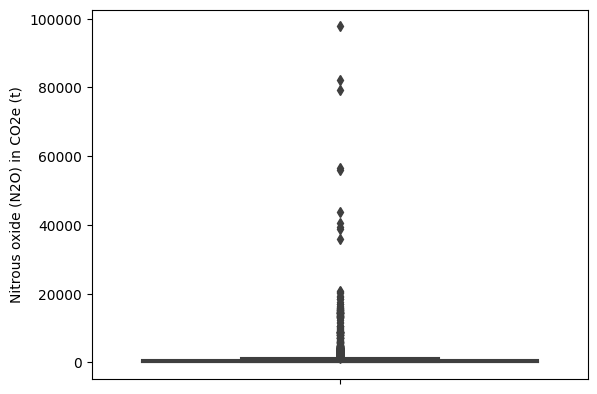

In [26]:
# nitrous

sns.boxplot(data=data, y='Nitrous oxide (N2O) in CO2e (t)')
plt.show()

# 3 clear outliers from rest of data
# will remove them, very different from rest of the data

data = data[data['Nitrous oxide (N2O) in CO2e (t)'] < 60000]

# remaining outliers are not largely different from remaining data

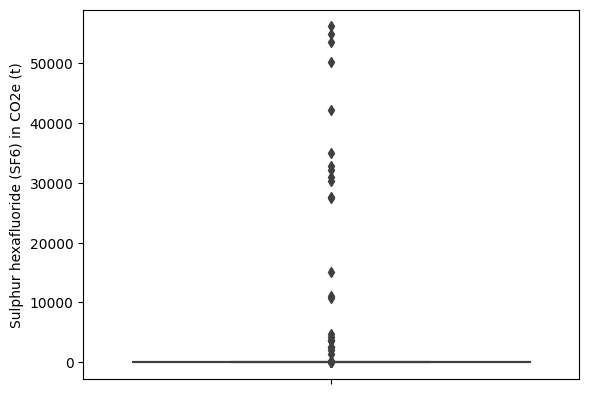

In [27]:
# sulphur

sns.boxplot(data=data, y='Sulphur hexafluoride (SF6) in CO2e (t)')
plt.show()

# large data spread
# will leave potential outliers in, could represent high polluters, not too different from other data

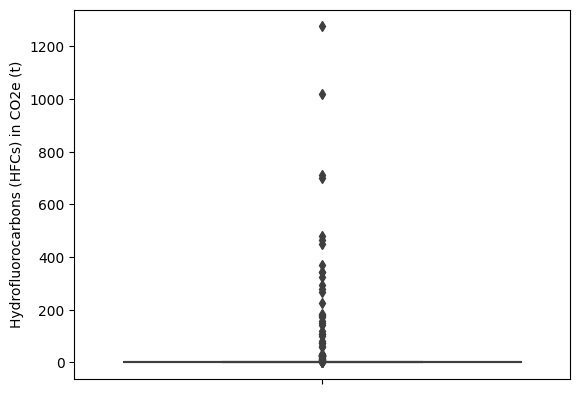

In [28]:
# hydrocarbons

sns.boxplot(data=data, y='Hydrofluorocarbons (HFCs) in CO2e (t)')
plt.show()

# clearly 2 outliers that will be removed
# too far from the other data to be used

data = data[data['Hydrofluorocarbons (HFCs) in CO2e (t)'] < 900]

# remaining outliers are not largely different from rest of data

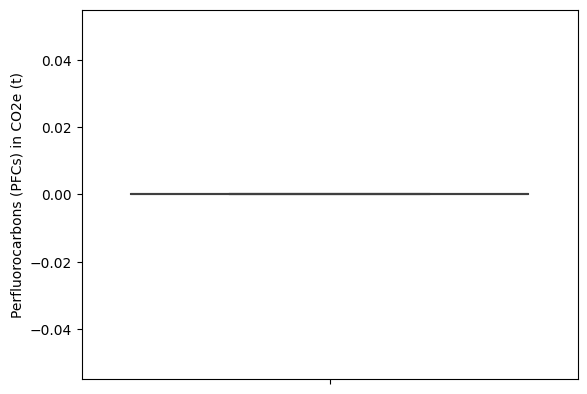

In [29]:
# perfluorcarbons

sns.boxplot(data=data, y='Perfluorocarbons (PFCs) in CO2e (t)')
plt.show()

# strange, appears to only contain 0s

# could drop this entire column, or exclude from pipeline, or let a model decide if its relevant

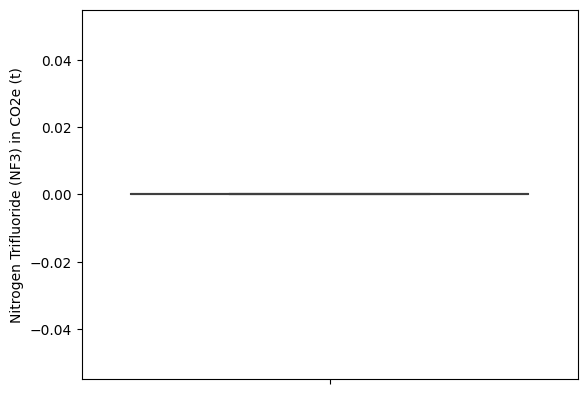

In [30]:
# nitrogen triflouride

sns.boxplot(data=data, y='Nitrogen Trifluoride (NF3) in CO2e (t)')
plt.show()

# same as above

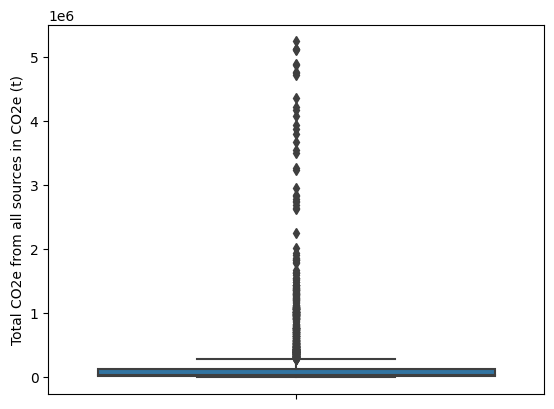

In [31]:
# total CO2

sns.boxplot(data=data, y='Total CO2e from all sources in CO2e (t)')
plt.show()

# large spread, no notable outliers

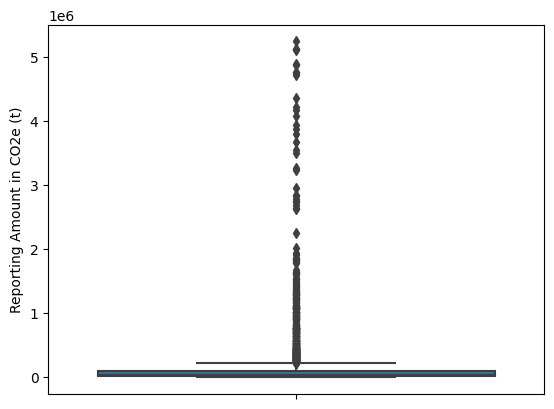

In [32]:
# reporting amout 

sns.boxplot(data=data, y='Reporting Amount in CO2e (t)')
plt.show()

# large spread, no discenable outliers

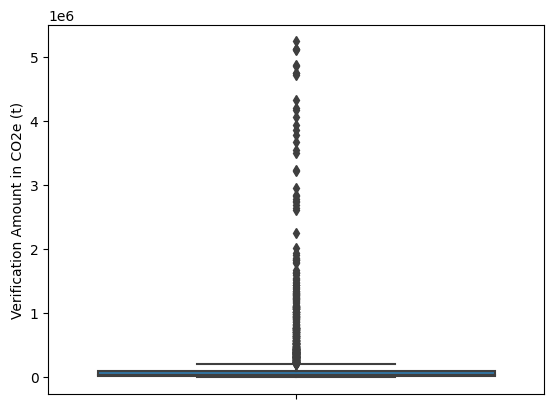

In [33]:
# verification amount

sns.boxplot(data=data, y='Verification Amount in CO2e (t)')
plt.show()

# same as above

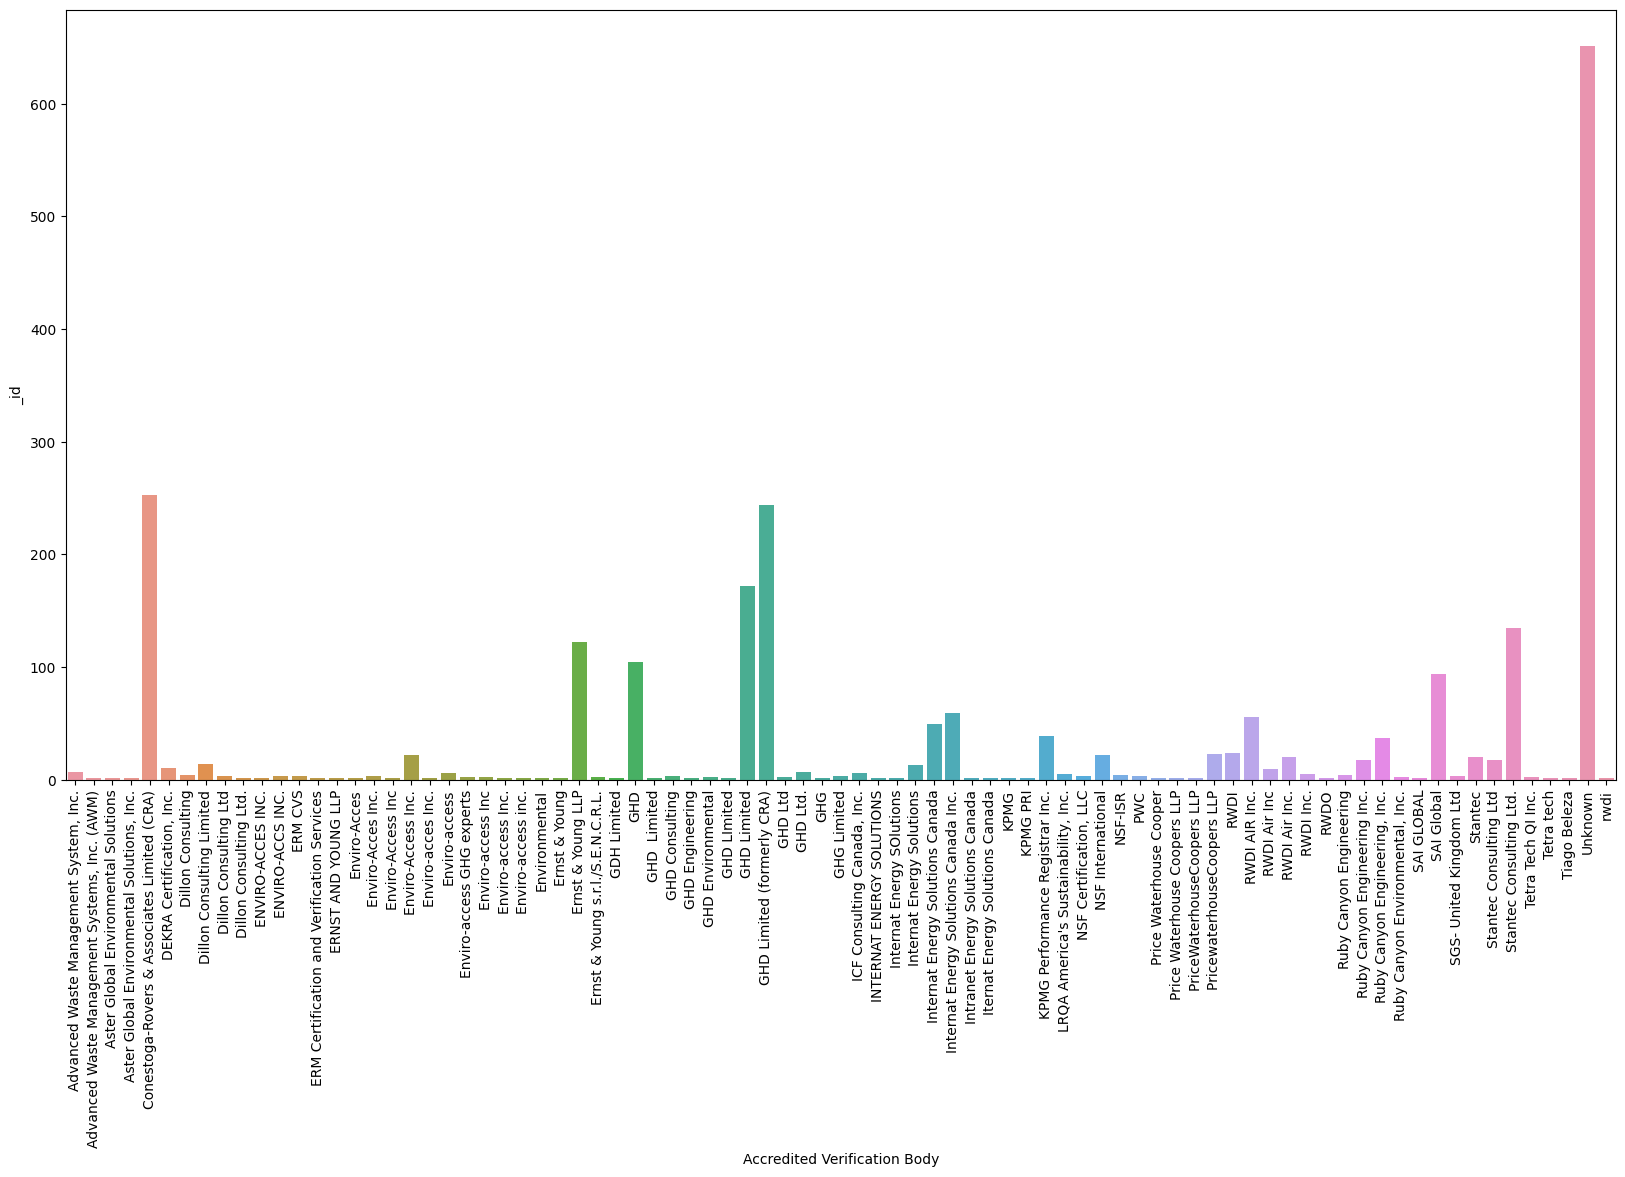

In [34]:
# accredited body

years = data.groupby('Accredited Verification Body')
plt.figure(figsize=(20,10)) 
sns.barplot(x = years['_id'].count().index, y = years['_id'].count())
plt.xticks(rotation=90)
plt.show()

# imbalance present, the unknowns account for much of the data

### Hypothesis / Prediction Problem

Off of a few features, can we predict what accreditting body verified a facilities emissions?    

* Obviously will not include names, ids or codes as features, otherwise prediction will be 100% accuracy

### Bi-Variate Analysis

* Will compare each variable to the target variable

In [35]:
# year vs target

# group by years and verification body
years = data.groupby(['Accredited Verification Body', 'Year'])['Year'].count()
# convert to dataframe
# years = pd.DataFrame(years)
# # unstack
# years = years.unstack()
years = pd.DataFrame(years)
pd.set_option('display.max_rows', None)
years

# it does appear that certain bodies are more active during certain years

Year
Accredited Verification Body                  Year      
Advanced Waste Management System, Inc.        2011     2
                                              2012     1
                                              2013     1
                                              2014     1
                                              2015     1
                                              2016     1
Advanced Waste Management Systems, Inc. (AWM) 2020     1
Aster Global Environmental Solutions          2020     1
Aster Global Environmental Solutions, Inc.    2020     1
Conestoga-Rovers & Associates Limited (CRA)   2011    58
                                              2012    59
                                              2013    66
                                              2014    70
DEKRA Certification, Inc.                     2011     4
                                              2012     6
Dillon Consulting                             2018     1
                                              2020     3
Dillon Consulting Limited                     2019     7
                                              2020     7
Dillon Consulting Ltd                         2020     3
Dillon Consulting Ltd.                        2019     1
ENVIRO-ACCES INC.                             2017     1
ENVIRO-ACCS INC.                              2019     1
                                              2020     2
ERM CVS                                       2016     2
                                              2017     1
ERM Certification and Verification Services   2017     1
ERNST AND YOUNG LLP                           2019     1
Enviro-Acces                                  2017     1
Enviro-Acces Inc.                             2017     2
                                              2018     1
Enviro-Access Inc                             2018     1
Enviro-Access Inc.                            2011     1
                                              2012     1
                                              2013     3
                                              2014     3
                                              2015     6
                                              2016     7
                                              2017     1
Enviro-acces Inc.                             2019     1
Enviro-access                                 2017     2
                                              2018     2
                                              2019     1
                                              2020     1
Enviro-access GHG experts                     2017     2
Enviro-access Inc                             2017     1
                                              2019     1
Enviro-access Inc.                            2018     1
Enviro-access inc.                            2020     1
Environmental                                 2019     1
Ernst & Young                                 2017     1
Ernst & Young LLP                             2011    21
                                              2012    20
                                              2013    19
                                              2014    20
                                              2015    16
                                              2016    16
                                              2017     4
                                              2018     5
                                              2020     1
Ernst & Young s.r.l./S.E.N.C.R.L.             2018     1
                                              2019     1
GDH Limited                                   2017     1
GHD                                           2011     1
                                              2012     1
                                              2013     2
                                              2014     2
                                              2015     2
                                              2016     1
     

In [36]:
# check with facility owner

# group by owner and verification body
years = data.groupby(['Accredited Verification Body', 'Facility Owner'])['Facility Owner'].count()
# convert to dataframe
years = pd.DataFrame(years)
pd.set_option('display.max_rows', None)
years

# certain facility owners use certain validation modies more, but not exlcusively
# for example ford uses 2 different bodies, but used 1 of them 7 times and the other once
# there does seem to be a correlation between the variables

Facility Owner
Accredited Verification Body                  Facility Owner                                                    
Advanced Waste Management System, Inc.        Ford Motor Company of Canada, Limited                            7
Advanced Waste Management Systems, Inc. (AWM) Ford Motor Company of Canada, Limited                            1
Aster Global Environmental Solutions          Covia Canada Ltd.                                                1
Aster Global Environmental Solutions, Inc.    Owens Corning Composite Materials Canada LP                      1
Conestoga-Rovers & Associates Limited (CRA)   ADM Agri-Industries Company                                      1
                                              Air Products Canada Ltd.                                         4
                                              Algoma Tubes Inc.                                                1
                                              Algonquin Power Energy From Waste Inc.                           3
                                              ArcelorMittal Dofasco Inc.                                       1
                                              Atlantic Packaging Products Ltd.                                 3
                                              Atlantic Power LP                                                8
                                              Brighton Beach Power L.P.                                        4
                                              Brock University                                                 4
                                              Bruce Power LP                                                   4
                                              Bunge Canada Holdings I ULC                                      4
                                              CERTAINTEED GYPSUM CANADA INC.                                   1
                                              Cabot Canada Limited                                             4
                                              Canada Starch Operating Company Inc.                             3
                                              CertainTeed Gypsum Canada, Inc.                                  3
                                              Clean Harbors Canada, Inc.                                       3
                                              Collingwood Ethanol LP                                           1
                                              Columbian Chemicals Canada Ltd.                                  3
                                              Columbian Chemicals Canada ULC                                   1
                                              Emerald Energy From Waste Inc.                                   1
                                              Essar Power Canada Ltd.                                          2
                                              Essar Steel Algoma Inc.                                          2
                                              Flakeboard Company Limited                                       4
                                              General Motors of Canada Limited                                 8
                                              Gerdau Ameristeel Corporation                                    8
                                              Goreway Station Partnership                                      3
                                              H.J. Heinz Co. of Canada Ltd.                                    2
                                              Hamilton Health Sciences Corporation                             4
                                              Hiram Walker & Sons Ltd.                                         3
                                              Honda Canada Inc.                                                4
                              

In [37]:
# by city

# group by city and verification body
years = data.groupby(['Accredited Verification Body', 'Facility City'])['Facility City'].count()
# convert to dataframe
# years = pd.DataFrame(years)
# # unstack
# years = years.unstack()
years = pd.DataFrame(years)
pd.set_option('display.max_rows', None)
years

# certain cities do appear more often with certain verification bodies
# oakville appears under multiple verification bodies with differing amoutns in each
# clearly is a correlation here

Facility City
Accredited Verification Body                  Facility City                                 
Advanced Waste Management System, Inc.        Oakville                                     6
                                              St. Thomas                                   1
Advanced Waste Management Systems, Inc. (AWM) OAKVILLE                                     1
Aster Global Environmental Solutions          HAVELOCK                                     1
Aster Global Environmental Solutions, Inc.    GUELPH                                       1
Conestoga-Rovers & Associates Limited (CRA)   Alliston                                     4
                                              Aylmer                                       4
                                              Bath                                         4
                                              Bowmanville                                  4
                                              Brampton                                    11
                                              Breslau                                      4
                                              Cambridge                                    8
                                              Cardinal                                     4
                                              Chatham                                      4
                                              Collingwood                                  1
                                              Corunna                                     11
                                              Guelph                                       6
                                              Hamilton                                    17
                                              Hamiton                                      4
                                              Havelock                                     1
                                              Ingersoll                                    4
                                              Kapuskasing                                  6
                                              Kingston                                     4
                                              Leamington                                   2
                                              London                                       8
                                              Lowbanks                                     4
                                              Maitland                                     4
                                              Milton                                       4
                                              Mississauga                                  8
                                              Moorefield                                   4
                                              Mooretown                                    4
                                              Nanticoke                                    4
                                              Nipigon                                      2
                                              North Bay                                    2
                                              Oshawa                                       4
                                              Port Colborne                                8
                                              Sarnia                                      16
                                              Sault Ste Marie                              8
                                              Sault Ste. Marie                             5
                                              Scarborough                                  6
                                              St. Catharines                               8
                                              St. Marys                         

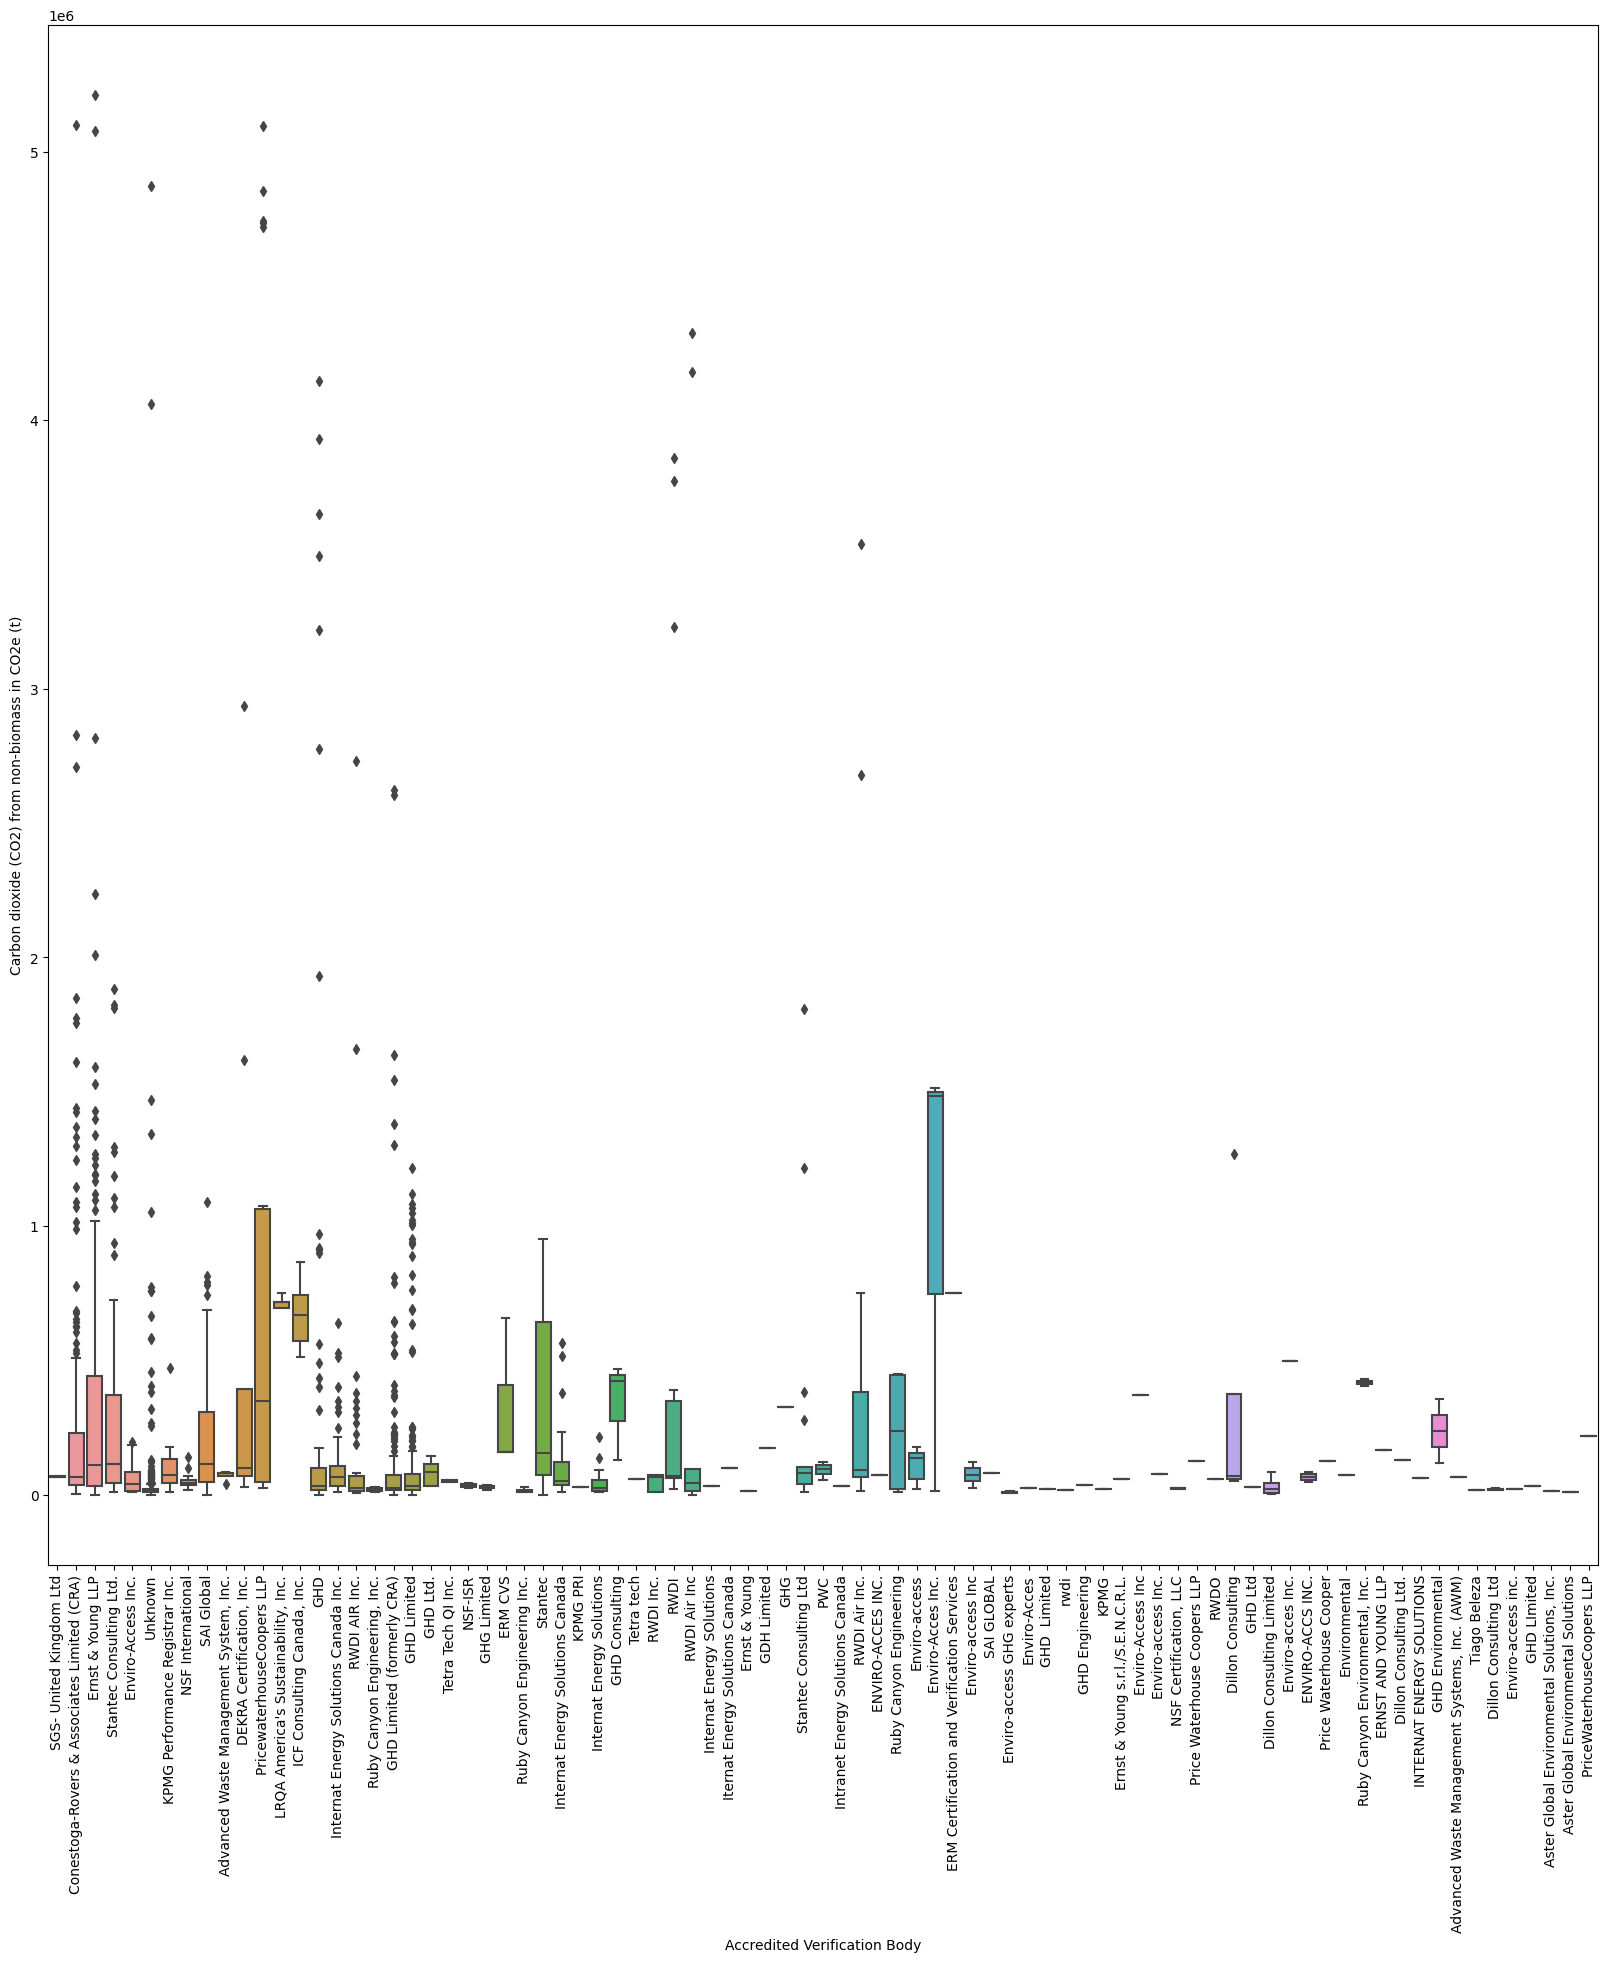

In [38]:
# Check CO2 from non biomass
plt.figure(figsize=(20,20))
sns.boxplot(x='Accredited Verification Body', y='Carbon dioxide (CO2) from non-biomass in CO2e (t)', data=data)
plt.xticks(rotation=90)
plt.show()

# large spreads of data
# clearly some verification bodies usually correspond to facilities with higher CO2 emissions, shown by differing means

### Feature Engineering

* Each categorical column will be one hot encoded

* Numerical columns will be scaled, either with a standard or min-max scaler

### Modelling

* Will test several different models

* For each model cross validation will be performed optimizing f1score.

In [60]:
# create data pipeline

# create data pipeline for logistic regression
catFeatures = ['Year', 'Facility Owner', 'Facility Name'] 
numFeatures = ['Carbon dioxide (CO2) from non-biomass in CO2e (t)', 'Carbon dioxide (CO2) from biomass in CO2e (t)', 'Methane (CH4) in CO2e (t)', 'Nitrous oxide (N2O) in CO2e (t)']
target = ['Accredited Verification Body']

# train and test set
x_train, x_test, y_train, y_test = train_test_split(data[catFeatures + numFeatures], data[target], test_size=0.3, random_state=1)

# build pipeline, transformers
# apply one hot encoding, scaling
# prevent one hot encoder from returning a sparse matrix (GuassianNB will throw an error otherwise)
catTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])

# build preprocessor
preprocessor = ColumnTransformer(transformers = [('cat', catTransformer, catFeatures), ('num', numTransformer, numFeatures)])

In [61]:
# logistic regression would fail in this case, no way to make this prediction binary

logRegress = Pipeline(steps = [('preprocessor', preprocessor), ('logistic', LogisticRegression())])

# probably just use its predictions to get the f1 score
# if selected, then do the conversions and create custom threshold during hyper param tuning

In [68]:
# attempt svm
svm = Pipeline(steps = [('preprocessor', preprocessor), ('svm', SVC())])

# fit
svm.fit(x_train, y_train)

# predict
pred = svm.predict(x_test)

# metrics
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, pred, average='weighted')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='weighted')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(svm, x_train, y_train, cv=10, scoring='f1_weighted')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

# slight reduction in f1 score, might be indicating slight over fitting
# somewhat poorly performing model

c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5914893617021276
Precision: 0.5439323504008561
Recall Score: 0.5914893617021276
F1 Score: 0.5108472981981437


c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-v

Cross Validation F1 Scores: [0.5200622  0.52711911 0.49572768 0.51274919 0.53357483 0.51495817
 0.51469193 0.4390886  0.51653777 0.50614769]
Mean cross validation F1 Score: 0.5080657166865822


In [65]:
# could try naieve bayes next

# it makes some assumptions about input data

# attempt svm
nb = Pipeline(steps = [('preprocessor', preprocessor), ('nb', GaussianNB())])

# fit
nb.fit(x_train, y_train)

# predict
pred = nb.predict(x_test)

# metrics
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, pred, average='weighted')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='weighted')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(nb, x_train, y_train, cv=10, scoring='f1_weighted')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.4978723404255319
Precision: 0.5665216288861784
Recall Score: 0.4978723404255319
F1 Score: 0.49599224832582195


c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: Future

Cross Validation F1 Scores: [0.46784091 0.51405466 0.48877858 0.43499396 0.52588304 0.57385941
 0.51903559 0.53264766 0.5215531  0.47103639]
Mean cross validation F1 Score: 0.5049683295582595


c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Hyper Parameter Tuning

* Will perform a random search with a limited amount of iterations in the interest of time

In [69]:
# hyper param tune the svc

params = {
    'svm__C': [1.0, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
    'svm__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'svm__degree': [2, 3, 4, 5, 6],
    'svm__gamma': ['scale', 'auto', 1.5, 2.5],
    'svm__shrinking' : [True, False]
}

# create grid search, pass in the tree by named step in the pipeline and the parameter dictionary
# random search will also perform cross validation using StratifiedKFold
randSearch = RandomizedSearchCV(svm, params, n_iter=10)

# perform fit
randSearch.fit(x_train, y_train)

# grab best params
bestParams = randSearch.best_params_
print(bestParams)

c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in versio

{'svm__shrinking': False, 'svm__kernel': 'linear', 'svm__gamma': 'auto', 'svm__degree': 4, 'svm__C': 3}


In [70]:
# since it returned a linear kernel, the degree parameter is meaningless, it only applies to polynomial kernels